In [23]:
%pip install pandas numpy

import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
data = pd.read_csv('Rainfall_and_Streamflow_Dataset.csv')

In [15]:
# create a lag features
data['lag1_precip'] = data['precipitation_mm'].shift(1).fillna(0)
data['lag2_precip'] = data['precipitation_mm'].shift(2).fillna(0)
data['lag3_precip'] = data['precipitation_mm'].shift(3).fillna(0)  

In [16]:
# cumulative and average rainfall feature
data['cum3_precip'] = data['precipitation_mm'].rolling(window=3).sum().fillna(0)
data['rolling_avg_precip'] = data['precipitation_mm'].rolling(window=5).mean().fillna(0)


In [17]:
# dry day in last three day
data['dry_days_before'] = data['precipitation_mm'].rolling(window=3).apply(lambda x: (x == 0).sum(), raw=True).fillna(0)


In [18]:
data['date'] = pd.to_datetime(data['date'])
# Temporal features
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['day_of_year'] = data['date'].dt.dayofyear
data['week_of_year'] = data['date'].dt.isocalendar().week
data['is_weekend'] = data['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

In [19]:
# Feature Expansion
features = [
    'lag1_precip', 'lag2_precip', 'lag3_precip',
    'cum3_precip', 'rolling_avg_precip',
    'dry_days_before',
    'day', 'month', 'day_of_year', 'week_of_year', 'is_weekend'
]
target = 'streamflow_cms'

In [20]:
X = data[features]
y = data[target]

In [21]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [26]:
mae = mean_absolute_error(y_test, y_pred)
r_2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r_2}')

Mean Absolute Error: 0.4504999999999999
R^2 Score: -4.616042452830191


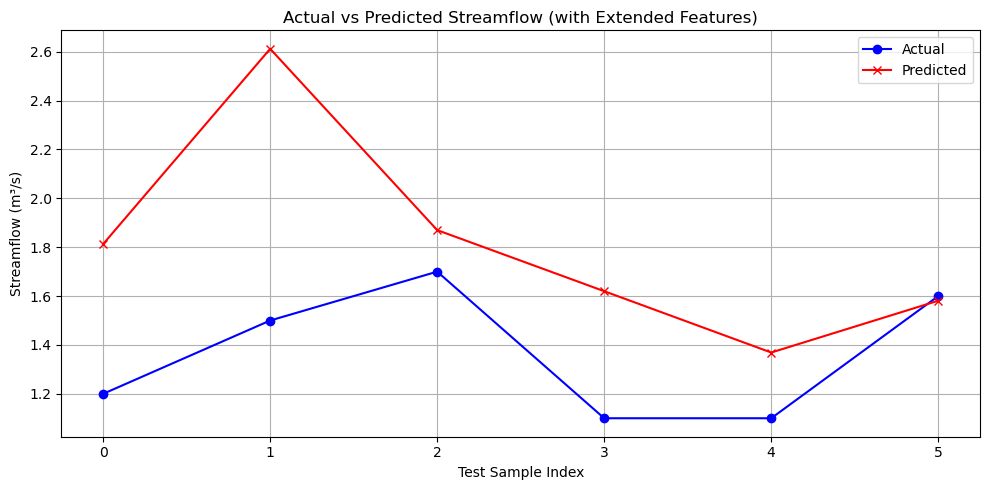

In [28]:
# plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='blue', marker='o')
plt.plot(y_pred, label='Predicted', color='red', marker='x')
plt.title('Actual vs Predicted Streamflow (with Extended Features)')
plt.xlabel('Test Sample Index')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
